# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [52]:
import pandas as pd
data = pd.read_csv('./marketing_investimento.csv')
data.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Com a função `drop`, podemos eliminar linhas (`axis=0`) ou colunas (`axis=1`) da base. Por padrão, a função retorna um **novo** dataframe sem as linhas/colunas especificadas, sem modificar inplace o dataframe original.

In [53]:
target = 'aderencia_investimento'
x = data.drop(target, axis=1)
y = data[target] # .target does not work on this case

In [54]:
x.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4


In [55]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios. Para essa transformação, utilizaremos o One-Hot Encoding, que cria uma coluna para cada valor categórico. Para cada linha, é atribuído o número 1 na coluna que representa a categoria armazenada para aquela linha. Quando a coluna possui somente um valor binário (sim/nao, presente/ausente, etc), não é necessário criar duas colunas - simplesmente substitui os valores por 0 ou 1.

O One-Hot Encoding possibilita transformar as variáveis explicativas em valores numéricos sem inserir vieses ao modelo (ou seja, os valores não adicionam ordem ou grandeza para cada categoria; elas continuarão tendo o mesmo "peso").

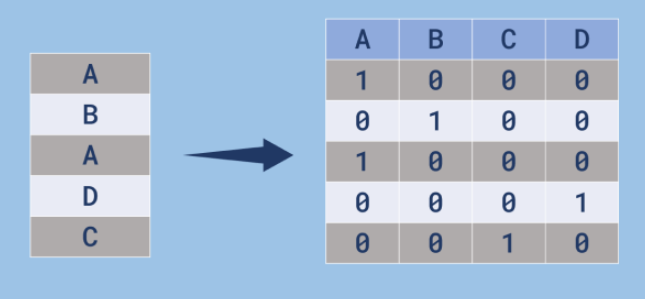

A função `make_column_tranformer` possibilita aplicar uma mesma transformação para várias colunas da base de dados (sem a necessidade de usar algum loop para chamar uma função transformadora diversas vezes). Com ela, podemos indicar quais colunas serão transformadas pelo One-Hot Encoding.

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# creating the transformer
categorical_cols = ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
one_hot = make_column_transformer(
    # first argument is a tuple (transformer, columns)
    (
        OneHotEncoder(drop='if_binary'), # when binary, use only one column
        categorical_cols
    ),
    remainder='passthrough', # keep the non-transformed columns
    sparse_threshold=0 # keep the dataframe "dense" (store all values)
)

O processo de transformação gera um **array**, sem o nome das colunas (ele já não é um dataframe). Por isso, antes de transformar os dados, iremos armazenar o nome das colunas, para posterior inserção em um novo dataframe que iremos criar.

O código anterior somente criou uma instância de `make_column_transformer` e a atribuiu à variável `one_hot`. Para iniciá-la e aplicar a transformação de fato, podemos chamar o método `fit_transform`.

In [57]:
cols = x.columns

# applying the transformer
x = one_hot.fit_transform(x)

Podemos passar o nome das colunas ao transformer, para que ele as utilize como base para o nome das colunas geradas pela transformação. Para isso, usamos a função `get_feature_names_out`.

In [58]:
new_cols = one_hot.get_feature_names_out(cols)
new_cols

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

Com o nome das colunas e os dados transformados, podemos criar um novo dataframe.

In [59]:
transformed_data = pd.DataFrame(x, columns=new_cols)
transformed_data.head()

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


### `get_dummies` vs `OneHotEncoder`

[Leia o artigo](https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher) para entender as vantagens e desvantagens de cada um. 

Em resumo, o `get_dummies` é mais simples e bom para análise exploratória, mas o `OneHotEncoder` é o recomendado para Machine Learning.

Exemplo usando o `get_dummies`:

In [60]:
dummies = data.drop(target, axis=1)
dummies = pd.get_dummies(dummies, columns=categorical_cols)

In [61]:
dummies.head()

,idade,saldo,tempo_ult_contato,numero_contatos,estado_civil_casado (a),estado_civil_divorciado (a),estado_civil_solteiro (a),escolaridade_fundamental,escolaridade_medio,escolaridade_superior,inadimplencia_nao,inadimplencia_sim,fez_emprestimo_nao,fez_emprestimo_sim
0,45,242,587,1,1,0,0,0,0,1,1,0,1,0
1,42,1289,250,4,1,0,0,0,1,0,1,0,1,0
2,23,363,16,18,0,0,1,0,0,1,1,0,1,0
3,58,1382,700,1,0,1,0,0,0,1,1,0,1,0
4,50,3357,239,4,1,0,0,0,1,0,1,0,1,0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Na base de dados que estamos analisando, podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

A biblioteca Scikit-Learn possui uma função de codificação **específica** para a **variável alvo**, a `LabelEncoder`.

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [63]:
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])